**NN&DeepLearning_Lesson: Autoencoders**

Lesson Overview:

In this lesson, we are going to discuss types and applications of Autoencoder.
Programming elements:
1. Basics of Autoencoders
2. Role of Autoencoders in unsupervised learning
3. Types of Autoencoders
4. Use case: Simple autoencoder-Reconstructing the existing image, which will contain most important
features of the image
5. Use case: Stacked autoencoder

In [18]:
# Import required Libraries
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# Load the Fashion MNIST dataset and preprocess the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


1. Add one more hidden layer to autoencoder

In [20]:
# this is the size of our encoded representations
encoding_dim = 32

# this is our input placeholder
input_img = Input(shape=(784,))

# Adding the first hidden layer with ReLU activation
hidden_layer_1 = Dense(encoding_dim, activation='relu')(input_img)

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hidden_layer_1)

# Adding the first hidden layer of the decoder with ReLU activation
hidden_layer_3 = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_layer_3)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Compiling the autoencoder model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Training the autoencoder
history=autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Performing predictions on test data
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/5
235/235 [==============================] - 4s 13ms/step - loss: 0.6950 - accuracy: 0.0010 - val_loss: 0.6949 - val_accuracy: 6.0000e-04
Epoch 2/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6949 - accuracy: 0.0010 - val_loss: 0.6948 - val_accuracy: 6.0000e-04
Epoch 3/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6948 - accuracy: 0.0011 - val_loss: 0.6947 - val_accuracy: 6.0000e-04
Epoch 4/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6946 - accuracy: 0.0010 - val_loss: 0.6946 - val_accuracy: 5.0000e-04
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
Also, visualize the same test data before reconstruction using Matplotlib

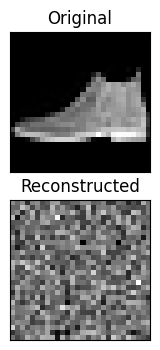

In [21]:
# Visualizing the reconstructed and original test images
n = 1  # Number of test images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original test images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed test images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


3. Repeat the question 2 on the denoisening autoencoder

In [22]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history_noisy=autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))
# Performing predictions on test data
decoded_imgs_noisy = autoencoder.predict(x_test)

Epoch 1/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6953 - accuracy: 0.0013 - val_loss: 0.6953 - val_accuracy: 0.0013
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6952 - accuracy: 0.0013 - val_loss: 0.6951 - val_accuracy: 0.0014
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.6951 - accuracy: 0.0013 - val_loss: 0.6950 - val_accuracy: 0.0015
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6949 - accuracy: 0.0013 - val_loss: 0.6949 - val_accuracy: 0.0015
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6948 - accuracy: 0.0013 - val_loss: 0.6947 - val_accuracy: 0.0014
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6947 - accuracy: 0.0013 - val_loss: 0.6946 - val_accuracy: 0.0015
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 0.6946 - accuracy: 0.0013 - val_loss: 0.6945 - val_accuracy: 0.0015

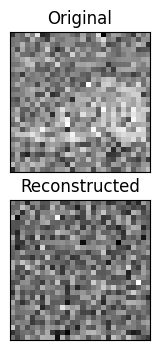

In [24]:
# Visualizing the reconstructed and original test images
n = 1  # Number of test images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original test images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed test images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


4. plot loss and accuracy using the history object

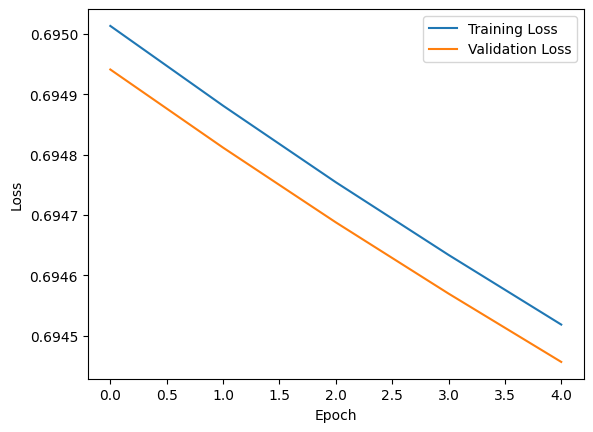

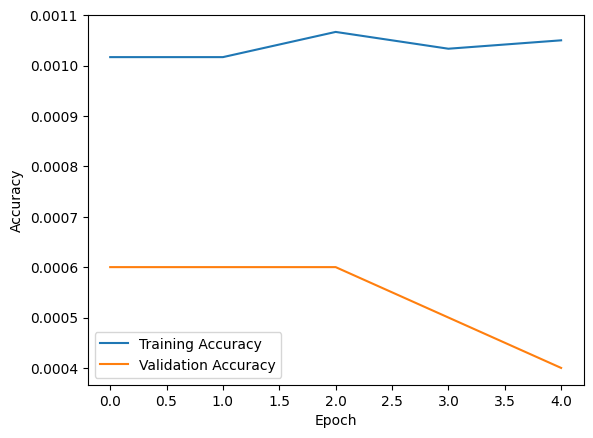

In [25]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()